<h2 style="color:#22198A">PROJECT INFO</h2>

<h3 style="color:green">About project-03</h3>
<p> The goal of this project is to find out if some characteristics of skin lesions can be reliably measured with a <b>smartphone app.</b> The
characteristics the dermatologist is especially interested in are: asymmetry, border and color.</p>
<p><b>Contact:</b> jtih@itu.dk, joap@itu.dk, luci@itu.dk</p>
<p><b>Created:</b> 06. 04. 2021</p>
<p><b>Last modified:</b> 22. 04. 2021 </p>

<h2 style="color:#22198A">NOTEBOOK SETUP</h2>
<p>Before you start working with the notebook, please make sure to go through this setup to ensure smooth running. (by default, no changes should be needed if you just downloaded the repository)</p>
<h3 style="color:green">Important highlights</h3>
<ul>
<li><b>BASE_DIR:</b> This should lead to the root directory relative to the location of this notebook</li>
<li><b>SCRIPTS IMPORT:</b> All scripts are saved within one file. In the file, there are comments splitting the whole file into sections which gather scripts with similar functionality, e.g. loading data. All functions should contain a docstring, which might be useful for any troubleshooting or just knowing how the given thing was implemented. The way the scripts are imported was implemented according to <a href='# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
'>this</a> SO question. <b>Once you run the below cell, all scripts should be loaded.</b></li>
<li><b>PACKAGES USED WITHIN DIRECTORY: </b> In <b>all_scripts.py</b> you can see in the beginning all the packages used, but it is worth highlight these "not so standard" packages which you should make sure you have installed: <b>pandas, scipy.</b></li>
</ul>

In [ ]:
import os
import sys
BASE_DIR = f"..{os.sep}..{os.sep}..{os.sep}"
USE_DEEPNOTE = True # In case you would open this notebook via Deepnote

# SCRIPTS IMPORT
scripts_path = os.path.abspath(os.path.join(f'{BASE_DIR}scripts'))

if scripts_path not in sys.path:
    # Add the scripts to the path
    sys.path.append(scripts_path)
    
    # Import the needed scripts
    from all_scripts import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)
else:
    
    # Import the needed scripts
    from all_scripts import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)

# PLOTS COLOR SETTING - see more here: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
PLOT_COLOR_SETTINGS = sns.color_palette("flare", as_cmap=True)

<h2 style="color:#22198A">CONSTANTS</h2>

In [ ]:
PATH_DATA = {
    "raw": f"{BASE_DIR}data{os.sep}raw{os.sep}",
    "processed": f"{BASE_DIR}data{os.sep}processed{os.sep}"
}

FILENAMES = {
    "GT_train_ISIC_2017": "ISIC-2017_Training_Part3_GroundTruth.csv",
    "GT_validate_ISIC_2017": "ISIC-2017_Validation_Part3_GroundTruth.csv",
    "GT_test_ISIC_2017": "ISIC-2017_Test_v2_Part3_GroundTruth.csv",
    "model_input": "model_input.csv"
}

<h2 style="color:#22198A">LOAD DATA</h2>

In [ ]:
 all_dfs_raw = {
    "train": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_train_ISIC_2017']}"),
    "validate": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_validate_ISIC_2017']}"),
    "test": pd.read_csv(f"{PATH_DATA['raw']}{FILENAMES['GT_test_ISIC_2017']}")
}

<h2 style="color:#22198A"> Clean data, extract features, prepare model input</h2>
<h3 style="color:green">Brief summary</h3>
<ul>
<li><b>Source of data:</b> The data comes from the <a href = 'https://challenge.isic-archive.com/landing/2017'>2017 ISIC challenge.</a></li>
</ul>

<h3 style="color:green">Initial exploration</h3>

<h4 style="color:#ff9900">Shape</h4>

In [ ]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}: {df.shape}")

train: (2000, 3)
validate: (150, 3)
test: (600, 3)


<h4 style="color:#ff9900">Are there any missing values?</h4>

In [ ]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}:\n{df.isnull().sum()}\n")

train:
image_id                0
melanoma                0
seborrheic_keratosis    0
dtype: int64

validate:
image_id                0
melanoma                0
seborrheic_keratosis    0
dtype: int64

test:
image_id                0
melanoma                0
seborrheic_keratosis    0
dtype: int64



<h4 style="color:#ff9900">What are the variable names?</h4>

In [ ]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}:\n{list(df.columns)}\n")

train:
['image_id', 'melanoma', 'seborrheic_keratosis']

validate:
['image_id', 'melanoma', 'seborrheic_keratosis']

test:
['image_id', 'melanoma', 'seborrheic_keratosis']



<h4 style="color:#ff9900">Can the same image contain example of both skin cancers?</h4>
No.

In [ ]:
for name_df, df in all_dfs_raw.items():
    count_both = sum((df["melanoma"] + df["seborrheic_keratosis"]) > 2)
    print(f"{name_df}:\n{count_both}\n")

train:
0

validate:
0

test:
0



<h3 style="color:green">Explore the distribution of data</h3>

<h4 style="color:#ff9900">How many melanomas examples are there?</h4>

In [ ]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}:\n{sum(df['melanoma'])/df.shape[0]*100} %\n")

train:
18.7 %

validate:
20.0 %

test:
19.5 %



<h4 style="color:#ff9900">How many keratosis examples are there?</h4>

In [ ]:
for name_df, df in all_dfs_raw.items():
    print(f"{name_df}:\n{sum(df['seborrheic_keratosis'])/df.shape[0]*100} %\n")

train:
12.7 %

validate:
28.000000000000004 %

test:
15.0 %



<h4 style="color:#ff9900">How many healthy examples are there?</h4>

In [ ]:
for name_df, df in all_dfs_raw.items():
    healthy = 1 - (sum(df['seborrheic_keratosis'])/df.shape[0] +  sum(df['melanoma'])/df.shape[0])
    print(f"{name_df}:\n{healthy*100} %\n")

train:
68.6 %

validate:
52.0 %

test:
65.5 %



<h3 style="color:green">Merge all the datasets into one</h3>

In [ ]:
all_data = all_dfs_raw["train"].append(all_dfs_raw["validate"], ignore_index=True).append(all_dfs_raw["test"], ignore_index=True)

# Make sure index is from 0 to N - 1
all_data.reset_index(drop=True, inplace=True)

# Show the shape
all_data.shape

(2750, 3)

<h4 style="color:#ff9900">Are all image IDs unique?</h4>

In [ ]:
unique_ids_count = len(pd.unique(all_data["image_id"]))
unique_ids_count == all_data.shape[0]

True

<h4 style="color:#ff9900">Is index of DF corresponding to our expectation? (Important for next step)</h4>

In [ ]:
current_indices = all_data.index.to_list()
expected_indices = [i for i in range(all_data.shape[0])]
current_indices == expected_indices

True

<h3 style="color:green">Add meta data</h3>

In [ ]:
all_data = getImageMetaData(all_data)

In [ ]:
# Check against missing values
all_data.isnull().sum()

image_id                0
melanoma                0
seborrheic_keratosis    0
db_id                   0
size_x                  0
size_y                  0
dtype: int64

<h3 style="color:green">Filter out too large images</h3>

In [ ]:
mask_x = all_data["size_x"] <= 3200
mask_y = all_data["size_y"] <= 2100
all_data = all_data[mask_x & mask_y]
sum(all_data["seborrheic_keratosis"])

193.0

In [ ]:
FEATURES=pd.read_csv(f"{PATH_DATA['processed']}{'model_balanced.csv'}")
FEATURES.keys()[3:]

Index(['compactness', 'assymetry', 'border_irr', 'color_spread'], dtype='object')

<h3 style="color:green">Sample from all data</h3>

In [ ]:
sampled_data = sampleFromAllData(all_data, N = 100, cancer_frac = 0.5)

TypeError: sampleFromAllData() missing 1 required positional argument: 'cancer_type'

In [ ]:
# TESTDF_kera=FEATURES
# TESTDF_mela=FEATURES
# TESTDF_kera=TESTDF_kera.drop('melanoma', axis=1)
# TESTDF_mela=TESTDF_mela.drop('keratosis', axis=1)
# TESTDF_mela=TESTDF_mela[FEATURES['melanoma']==1]
# TESTDF_kera=TESTDF_kera[FEATURES['keratosis']==1]
# for i in list(FEATURES.keys()[3:]):
#     TESTDF_mela_comp=pd.DataFrame(TESTDF_mela[i])
#     TESTDF_kera_comp=pd.DataFrame(TESTDF_kera[i])
#     TESTDF_mela_comp.reset_index(drop=True, inplace=True)
#     TESTDF_kera_comp.reset_index(drop=True, inplace=True)
#     TESTDF_mela_comp=TESTDF_mela_comp.rename(columns={i: 'Melanoma_'+i})
#     TESTDF_kera_comp=TESTDF_kera_comp.rename(columns={i: 'Keratosis_'+i})
#     PLOTDATA=pd.concat([TESTDF_mela_comp,TESTDF_kera_comp], axis=1)
#     sns.pairplot(data=PLOTDATA)

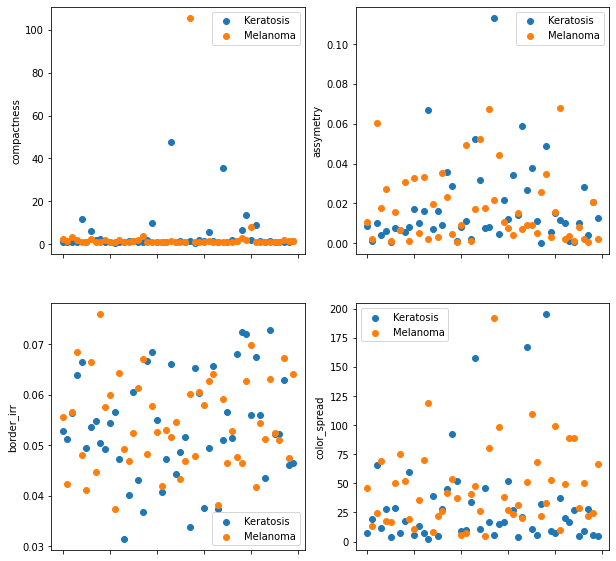

In [ ]:
TESTDF_kera=FEATURES
TESTDF_mela=FEATURES
TESTDF_kera=TESTDF_kera.drop('melanoma', axis=1)
TESTDF_mela=TESTDF_mela.drop('keratosis', axis=1)
TESTDF_mela=TESTDF_mela[FEATURES['melanoma']==1]
TESTDF_kera=TESTDF_kera[FEATURES['keratosis']==1]
fig, axs= plt.subplots(2,2)
fig.set_size_inches(10, 10)
count=0
for i in range(2):
    for x in range(2):
        Feat=FEATURES.keys()[3:][count]
        count+=1
        TESTDF_mela_feat=pd.DataFrame(TESTDF_mela[Feat])
        TESTDF_kera_feat=pd.DataFrame(TESTDF_kera[Feat])
        axs[i,x].set_xticklabels([])
        axs[i,x].set_xticklabels([])
        axs[i,x].scatter(range(len(TESTDF_kera_feat)),TESTDF_kera_feat,label='Keratosis')
        axs[i,x].scatter(range(len(TESTDF_mela_feat)),TESTDF_mela_feat,label='Melanoma')
        axs[i,x].legend()
        axs[i,x].set_ylabel(Feat)

# Pair plot

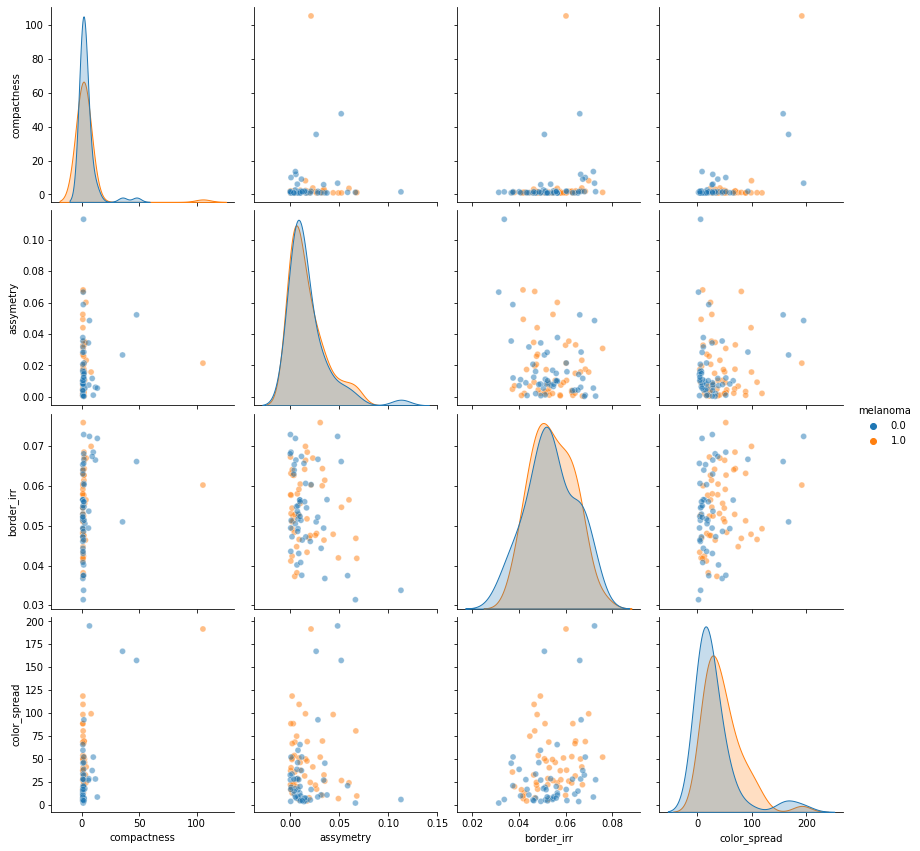

In [ ]:
sns.pairplot(data=FEATURES, vars=list(FEATURES.columns[3:]),height=3, hue='melanoma',plot_kws={'alpha':0.5});

In [ ]:
FEATURES

,melanoma,keratosis,compactness,assymetry,border_irr,color_spread
0,1.0,0.0,-0.218809,-0.658122,-1.719548,-0.071077
1,0.0,1.0,-0.182660,-0.886412,1.943670,-0.286617
2,1.0,0.0,-0.245800,-0.875569,0.388672,-0.033025
3,0.0,1.0,0.817068,-0.622183,1.844424,-0.770988
4,0.0,1.0,-0.242512,-0.871123,-0.469305,-0.892039
...,...,...,...,...,...,...
95,1.0,0.0,0.362220,-0.092321,1.638378,1.562340
96,1.0,0.0,-0.222305,2.568193,-0.737532,1.081718
97,1.0,0.0,-0.241716,-0.796502,-0.489084,2.058254
98,0.0,1.0,-0.242100,-0.688517,1.026412,-0.688786


In [ ]:
# FEATURES[FEATURES['melanoma']==1]
TESTDF_kera=FEATURES
TESTDF_mela=FEATURES
TESTDF_kera=TESTDF_kera.drop('melanoma', axis=1)
TESTDF_mela=TESTDF_mela.drop('keratosis', axis=1)
TESTDF_mela=TESTDF_mela[FEATURES['melanoma']==1]
TESTDF_kera=TESTDF_kera[FEATURES['keratosis']==1]
TESTDF_mela_comp=pd.DataFrame(TESTDF_mela['compactness'])
TESTDF_kera_comp=pd.DataFrame(TESTDF_kera['compactness'])
PLOTDATA=pd.concat([TESTDF_mela_comp,TESTDF_kera_comp], axis=1,ignore_index=True)
PLOTDATA
# sns.pairplot(data=PLOTDATA)

,0,1
0,-0.218809,NaN
1,NaN,-0.182660
2,-0.245800,NaN
3,NaN,0.817068
4,NaN,-0.242512
...,...,...
95,0.362220,NaN
96,-0.222305,NaN
97,-0.241716,NaN
98,NaN,-0.242100


<h3 style="color:green">Build the model input csv</h3>

In [ ]:
run_building_the_model_input = False
# {FILENAMES['model_input']}
path_to_save = f"{PATH_DATA['processed']}model_balanced.csv"
if run_building_the_model_input:
    buildClassifierInput(sampled_data, chunk_size = 100, temp_img_fold = "imageData/", path_to_save = path_to_save)

<h2 style="color:#22198A"> Load model input, normalize it</h2>

In [ ]:
# Load the data
FEATURES_UNNORMALIZED = pd.read_csv(path_to_save)

# Separate Image Ids
IMAGE_IDs = FEATURES_UNNORMALIZED['image_id']

# Drop Image Id
FEATURES_UNNORMALIZED = FEATURES_UNNORMALIZED.drop(['image_id'],axis=1)

# Normalize the data
FEATURES = normalizeFeatures(FEATURES_UNNORMALIZED)

# Shuffle randomly the rows
FEATURES = FEATURES.sample(frac=1).reset_index(drop=True)

<h2 style="color:#22198A">Split the data into training and test</h2>

In [ ]:
columns_with_features = list(FEATURES.columns[3:])
columns_with_features

['assymetry', 'border_irr', 'color_spread']

<h3 style="color:green">Melanoma</h3>

In [ ]:
X_train_mel, X_test_mel, y_train_mel, y_test_mel = splitDataIntoTrainTest(FEATURES[columns_with_features], FEATURES.iloc[:, 0])

<h3 style="color:green">Keratosis</h3>

In [ ]:
X_train_ker, X_test_ker, y_train_ker, y_test_ker = splitDataIntoTrainTest(FEATURES[columns_with_features], FEATURES.iloc[:, 1])

<h2 style="color:#22198A">Feature selection</h2>

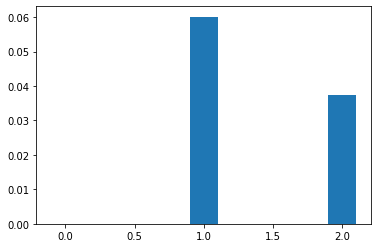

In [ ]:
# Get feature scores for melanoma data set
feature_scores_mel = featureScores(X_train_mel, y_train_mel, k=2)

# Get feature scores for keratosis data set
feature_scores_ker = featureScores(X_train_ker, y_train_ker, k=2)

# Get no. of features
features_mel = len(feature_scores_mel)
features_ker = len(feature_scores_ker)

# Visualize feature scores
plt.bar(np.arange(0,features_ker), feature_scores_ker, width=.2)
plt.show()

<h2 style="color:#22198A">Select and build classifiers</h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
CLFS = {
    "linear_svc": svm.LinearSVC(max_iter = 5000),
    "knn5": KNeighborsClassifier(n_neighbors=5),
    "knn10": KNeighborsClassifier(n_neighbors=10),
    "DTC": DecisionTreeClassifier(random_state=0),
    "RFC": RandomForestClassifier(max_depth=2, random_state=0)
}

<h2 style="color:#22198A">Evaluate the results using cross-validation</h2>

<h3 style="color:green">Melanoma</h3>

In [ ]:
crossValidate(X_train_mel, y_train_mel, CLFS)

,classifier_name,accuracy,precision,recall,roc_auc
0,linear_svc,0.5750,0.588889,0.525,0.628125
1,knn5,0.6625,0.651667,0.675,0.634375
2,knn10,0.5625,0.608730,0.400,0.590625
3,DTC,0.5875,0.567273,0.725,0.587500
4,RFC,0.6625,0.636717,0.750,0.687500


<h3 style="color:green">Keratosis</h3>

In [ ]:
crossValidate(X_train_ker, y_train_ker, CLFS)

,classifier_name,accuracy,precision,recall,roc_auc
0,linear_svc,0.5250,0.518065,0.800,0.553125
1,knn5,0.6125,0.602778,0.700,0.675000
2,knn10,0.6250,0.606364,0.700,0.689063
3,DTC,0.5875,0.596190,0.600,0.587500
4,RFC,0.6625,0.686190,0.625,0.673438


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a47fbf6-c653-4328-90db-f0771def66a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>